In [1]:
import pickle 
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Ieremie\\Documents\\Individual project\\secondSemester\\Personal-Project\\kfold': ['.ipynb_checkpoints', 'all_dataset_window19Middle.npy', 'all_dataset_window19Middle.npy.gz', 'bigModelHistograms.ipynb', 'kfold-1hot', 'kfold-pssm', 'kfold.ipynb', 'Untitled.ipynb']


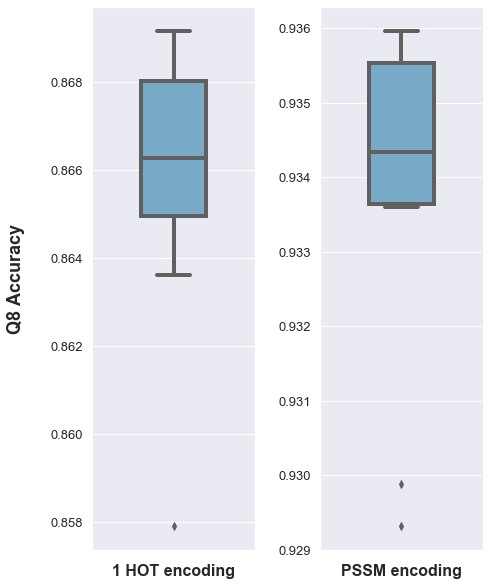

In [136]:
import seaborn as sns


oneHotQ8 = []
pssmQ8 = []

for i in range(1,11):
    m1s = pickle.load( open( "kfold-1hotQ2/model_scores_kfold" + str(i), "rb" ) )
    oneHotQ8.append(m1s[1])
    m2s = pickle.load( open( "kfold-pssmQ2/model_scores_kfold" + str(i), "rb" ) )
    pssmQ8.append(m2s[1])

fig = plt.figure()
fig.set_size_inches(7,10)
#ax = plt.gca()

gs = gridspec.GridSpec(1, 2, wspace=0.4, width_ratios=[1,1])

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.set_ylabel("Q8 Accuracy", fontsize=18, labelpad=25, weight='bold')
ax0.set_xlabel("1 HOT encoding",  fontsize=16, weight='bold')

ax1.set_xlabel("PSSM encoding",  fontsize=16, weight='bold')


ax0.tick_params(labelsize=13)
ax1.tick_params(labelsize=13)

sns.set(style="darkgrid")
sns.boxplot(y = oneHotQ8, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax0)
sns.boxplot(y = pssmQ8, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax1)

#sns.swarmplot(y = oneHotQ8, color="g", ax = ax0)


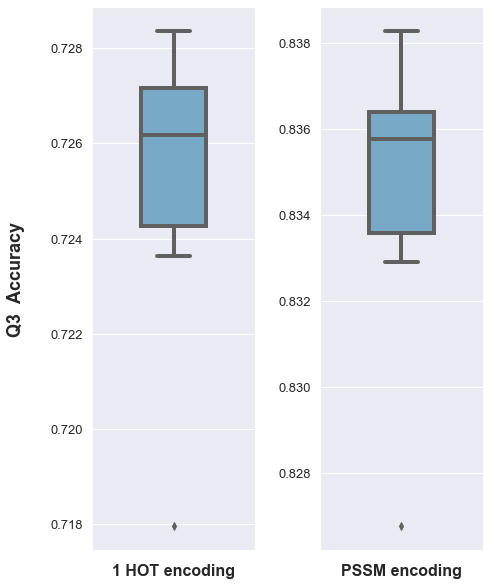

In [131]:
import seaborn as sns


oneHotQ3 = []
pssmQ3 = []
for i in range(1,11):
    m1s = pickle.load( open( "kfold-1hotQ3/model_scores_kfold" + str(i), "rb" ) )
    oneHotQ3.append(m1s[1])
    m2s = pickle.load( open( "kfold-pssmQ3/model_scores_kfold" + str(i), "rb" ) )
    pssmQ3.append(m2s[1])
    

fig = plt.figure()
fig.set_size_inches(7,10)
#ax = plt.gca()

gs = gridspec.GridSpec(1, 2, wspace=0.4, width_ratios=[1,1])

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])


ax0.tick_params(labelsize=13)
ax1.tick_params(labelsize=13)

ax0.set_ylabel("Q3  Accuracy", fontsize=18, labelpad=25, weight='bold')
ax0.set_xlabel("1 HOT encoding",  fontsize=16, weight='bold')

ax1.set_xlabel("PSSM encoding",  fontsize=16, weight='bold')

sns.set(style="darkgrid")
sns.boxplot(y = oneHotQ3, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax0)
sns.boxplot(y = pssmQ3, orient="v",linewidth=4,palette="Blues", width=0.4, ax = ax1)
